# <center> Прогноз победителя Dota 2

<img src='https://habrastorage.org/webt/ua/vn/pq/uavnpqfoih4zwwznvxubu33ispy.jpeg'>

#### <center> Автор оригинала Петр Ромов, перевод и адаптация Юрия Кашницкого (@yorko)
    
### Быстрый старт

Возьмите признаки, подготовленные организаторами, обучите модель и отправьте результаты.

1. Описание данных
2. Признаки, созданные организаторами
3. Обучение и оценка модели
4. Подготовка результатов

### Теперь сделайте это как настоящий Data Scientist

5. Перекрестная проверка
6. Работа со всей доступной информацией по играм в Доту
7. Генерация признаков
8. Как создать начальные признаки с нуля

## Описание данных

У нас есть следующие файлы:

- `sample_submission.csv`: пример файла отправки
- `train_matches.jsonl`, `test_matches.jsonl`: полные «сырые» данные обучения
- `train_features.csv`, `test_features.csv`: признаки, созданные организаторами
- `train_targets.csv`: результаты тренировочных игр (включая победителя)

## Признаки, созданные организаторами

Это основные признаки, которые включают простую статистику игроков. Прокрутите до конца, чтобы узнать, как создавать эти признаки из необработанных файлов json.

## Описание соревнования

### Описание

В этом соревновании ваша задача — предсказать исход игры в Dota 2 с учетом всех характеристик игры до определенного момента в игре. В играх Dota 2 есть две команды: Radiant и Dire. Вам нужно будет оценить шансы команды Radiant на победу. Игровые данные представлены числовыми и категориальными признаками, журналами событий, временными рядами и т. д. Работа с игровыми данными и умение видеть закономерности могут оказаться очень полезными в дальнейшей работе.

В обычной игре Dota 2 каждая из двух команд — Radiant и Dire — состоит из 5 игроков. Для каждой игры игрок выбирает героя и соответственно роль. Dota 2 — командная игра, поэтому состав команды имеет значение. Карта содержит базы каждой команды (фонтан) и по 3 линии с каждой стороны, магазины, логово Рошана и другие элементы.

<img src='https://habrastorage.org/webt/vq/h2/9c/vqh29cm1vd-69blhriyqr98saww.png'>

Во время игры игроки улучшают своих героев, покупают предметы, разрушают башни, убивают героев противника, фармят вражеских крипов и добивают врагов их крипов. Цель состоит в том, чтобы уничтожить фонтан противника. Ничья в Dota 2 невозможна.

Этот конкурс организован в сотрудничестве с GOSU.AI — разработчиками платформы, которая помогает играть умнее и улучшать навыки за счет подробного анализа матчей и личных рекомендаций в DOTA 2, PUBG, Counter Strike и других играх.

### Оценка

Для оценки мы используем ROC-AUC. Выход для этой задачи двоичный: для каждой игры мы собираемся вывести 1 для предсказания победы команды Radiant и 0 для предсказания поражения. Но поскольку мы оцениваем шансы на результат, результирующее число будет находиться в интервале `[0,1]`. Позже это число сравнивается с некоторым порогом, который позволяет нам вывести бинарный ответ (так это делается в логистической регрессии, дереве решений, случайном лесу и многих других алгоритмах).

Кривая ROC построена на значениях FPR (коэффициент ложных срабатываний) и TPR (коэффициент истинных срабатываний) в качестве оси с различными пороговыми значениями. Базовым уровнем ROC-AUC будет подбрасывание монеты или случайное угадывание, где площадь под кривой будет равна 0,5. Чем больше площадь под ROC-кривой, тем лучше прогноз.

## Об этом соревновании

### Описания файлов:

- `train_features.csv`: базовый обучающий набор, подготовленный организаторами (подробности см. в этом ядре)
- `test_features.csv`: базовый тестовый набор, подготовленный организаторами
- `train_targets.csv`: ответы для игр из тренировочного набора (выиграл ли в итоге Radiant)
- `train_matches.jsonl`: необработанные данные тренировки
- `test_matches.jsonl`: необработанные тестовые данные

### Поля данных

В необработанных файлах JSON вы найдете следующие данные.

Статистика игрока (начинается с префикса для идентификации игрока: `r` для команды Radiant или `d` для команды Dire и номера игрока) включает следующие поля:

- `hero_id` - id героя
- `K/D/A` - убийства, смерти и помощь
- `lh` - количество добитых крипов вражеской команды
- `denies` - количество добитых (заденаеных) союзных крипов, чтобы лишить врага золота
- `gold` - золото
- `xp` - опыт
- `level` - уровень
- `health`, `max_health` - здоровье и максимальное здоровье
- `max_mana` - максимальная мана
- `x`, `y` - текущее местоположение игрока
- `stuns` - продолжительность станов
- `creeps_stacked` - стакнутые крипы
- `camps_stacked` - стакнутые кэмпы
- `rune_pickups` - подборов рун
- `firstblood_claimed` - первая кровь
- `teamfight_participation` - участие в тимфайтах
- `towers_killed` - разрушенные башни
- `roshans_killed` - убитые рошаны
- `obsplaced`, `senplaced` - количество вардов Observer и Sentry, расставленных игроком

Многие другие полезные признаки еще предстоит обнаружить в файлах необработанных данных. В полях игрока с суффиксом *`log` вы можете найти логи различных событий, таких как время и место установки варда; или лог выкупов игрока (игрок может ускорить ее возвращение в игру после смерти, потратив на это немного золота). Есть также поля временных рядов, которые могут оказаться полезными во время этого соревнования. Поле `times` состоит из массива меток времени и полей `t`* со значениями для разных функций:

- `gold_t` - значения золота для разных временных меток
- `xp_t` - значение опыта для разных временных меток
    - `lh` - добивания крипов
    - `dn_t` - денай крипов

Будьте изобретательны и удачи!

In [1]:
import os
import pandas as pd

PATH_TO_DATA = './data/'

df_train_features = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_features.csv'), index_col='match_id_hash')
df_train_targets = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_targets.csv'), index_col='match_id_hash')

У нас есть ~ 40 тысяч игр, каждая из которых описана `match_id_hash` (идентификатор игры) и 245 признаков. Также указывается `game_time` - время (в секундах), когда игра закончилась.

In [2]:
df_train_features.shape

(39675, 245)

In [3]:
df_train_features.head()

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,22,7,1,11,11,0,0,0,0,...,0.000000,0,0,0,0,0.00,0,0,0,0
b9c57c450ce74a2af79c9ce96fac144d,658,4,0,3,10,15,7,2,0,7,...,0.000000,0,0,0,0,0.00,0,0,0,0
6db558535151ea18ca70a6892197db41,21,23,0,0,0,101,0,0,0,0,...,0.000000,0,0,0,0,0.00,0,0,0,0
46a0ddce8f7ed2a8d9bd5edcbb925682,576,22,7,1,4,14,1,0,3,1,...,8.664527,3,1,3,0,0.00,0,0,2,0
b1b35ff97723d9b7ade1c9c3cf48f770,453,22,7,1,3,42,0,1,1,0,...,0.000000,2,1,2,0,0.25,0,0,0,0


Нас интересует столбец `radiant_win` в файле `train_targets.csv`. Все эти признаки неизвестны во время игры (они приходят «из будущего» по сравнению с `game_time`), поэтому у нас есть эти признаки только для обучающих данных.

In [4]:
df_train_targets.head()

,game_time,radiant_win,duration,time_remaining,next_roshan_team
match_id_hash,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,False,992,837,NaN
b9c57c450ce74a2af79c9ce96fac144d,658,True,1154,496,NaN
6db558535151ea18ca70a6892197db41,21,True,1503,1482,Radiant
46a0ddce8f7ed2a8d9bd5edcbb925682,576,True,1952,1376,NaN
b1b35ff97723d9b7ade1c9c3cf48f770,453,False,2001,1548,NaN


## Обучение и оценка модели

#### Давайте построим матрицу признаков `X` и целевой вектор `y`

In [5]:
X = df_train_features.values
y = df_train_targets['radiant_win'].values

#### Выполнение разделения обучения/тестирования (простая схема проверки)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.3, 
                                                      random_state=17)

#### Обучение модели случайного леса

In [7]:
%%time
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, n_jobs=4, random_state=17)
model.fit(X_train, y_train)

Wall time: 4.24 s


RandomForestClassifier(n_jobs=4, random_state=17)

#### Сделать прогнозы для набора удержания

Нам нужно предсказать вероятности класса 1 — что Radiant победит, поэтому нам нужен индекс 1 в матрице, возвращаемой методом `predict_proba`.

In [8]:
y_pred = model.predict_proba(X_valid)[:, 1]

Давайте взглянем:

In [9]:
y_pred

array([0.14, 0.44, 0.5 , ..., 0.58, 0.72, 0.51])

#### Давайте оценим качество предсказания для набора удержания

Рассчитаем ROC-AUC.

In [10]:
from sklearn.metrics import roc_auc_score

valid_score = roc_auc_score(y_valid, y_pred)
print('Validation ROC-AUC score:', valid_score)

Validation ROC-AUC score: 0.7772318342722802


Из любопытства мы можем рассчитать точность классификатора, который предсказывает класс 1, если прогнозируемая вероятность выше 50%.

In [11]:
from sklearn.metrics import accuracy_score

valid_accuracy = accuracy_score(y_valid, y_pred > 0.5)
print('Validation accuracy of P>0.5 classifier:', valid_accuracy)

Validation accuracy of P>0.5 classifier: 0.6974712257414097


## Подготовка отправки

Теперь то же самое для тестовых данных.

In [12]:
df_test_features = pd.read_csv(os.path.join(PATH_TO_DATA, 'test_features.csv'), index_col='match_id_hash')

X_test = df_test_features.values
y_test_pred = model.predict_proba(X_test)[:, 1]

df_submission = pd.DataFrame({'radiant_win_prob': y_test_pred}, index=df_test_features.index)

In [13]:
df_submission.head()

,radiant_win_prob
match_id_hash,
30cc2d778dca82f2edb568ce9b585caa,0.49
70e5ba30f367cea48793b9003fab9d38,0.81
4d9ef74d3a2025d79e9423105fd73d41,0.67
2bb79e0c1eaac1608e5a09c8e0c6a555,0.69
bec17f099b01d67edc82dfb5ce735a43,0.41


Сохраните файл отправки, удобно включить текущую дату и время в имя файла.

In [14]:
import datetime
submission_filename = 'submission_{}.csv'.format(
    datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))
df_submission.to_csv(submission_filename)
print('Submission saved to {}'.format(submission_filename))

Submission saved to submission_2022-05-07_07-33-06.csv


## Перекрестная проверка

Как мы уже знаем, перекрестная проверка является более надежным методом проверки, чем просто разделение обучения/тестирования. Здесь мы прибегнем к `ShuffleSplit`, чтобы создать 5 разделений 70%/30%.

In [15]:
from sklearn.model_selection import ShuffleSplit, KFold
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=17)

In [16]:
from sklearn.model_selection import cross_val_score

#### Запустить перекрестную проверку

Мы будем обучать 2 версии модели `RandomForestClassifier` - первую с емкостью по умолчанию (деревья не ограничены в глубину), вторую - с `min_samples_leaf`=3, т.е. каждый лист обязан иметь не менее 3-х экземпляров.

In [17]:
%%time

model_rf1 = RandomForestClassifier(n_estimators=100, n_jobs=4,
                                   max_depth=None, random_state=17)

# calcuate ROC-AUC for each split
cv_scores_rf1 = cross_val_score(model_rf1, X, y, cv=cv, scoring='roc_auc')

Wall time: 26.3 s


In [18]:
%%time

model_rf2 = RandomForestClassifier(n_estimators=100, n_jobs=4,
                                   min_samples_leaf=3, random_state=17)

cv_scores_rf2 = cross_val_score(model_rf2, X, y, cv=cv, 
                                scoring='roc_auc', n_jobs=-1)

Wall time: 20 s


#### Результаты перекрестной проверки

Результат, возвращаемый `cross_val_score`, представляет собой массив со значениями метрик (ROC-AUC) для каждого разделения:

In [19]:
cv_scores_rf1

array([0.77723183, 0.78656801, 0.78004904, 0.77732062, 0.77669984])

In [20]:
cv_scores_rf2

array([0.78326353, 0.78474773, 0.7834311 , 0.77761287, 0.78531665])

Давайте сравним среднее значение ROC-AUC среди всех сплитов для обеих моделей.

In [21]:
print('Model 1 mean score:', cv_scores_rf1.mean())
print('Model 2 mean score:', cv_scores_rf2.mean())

Model 1 mean score: 0.7795738699757455
Model 2 mean score: 0.7828743777187194


Предпочтение отдается второй модели. Послушайте, здесь есть оговорка: вторая модель на самом деле лучше подходит для 4 сплитов из 5. Поэтому, если бы мы выполнили только один сплит обучение/тест, с вероятностью 20% мы сделали бы неверный вывод, что первая модель лучше.

In [22]:
cv_scores_rf2 > cv_scores_rf1

array([ True, False,  True,  True,  True])

## Работа со всей доступной информацией по играм в Доту
Описания необработанных данных для всех игр приведены в файлах `train_matches.jsonl` и `test_matches.jsonl`. В каждом файле есть одна запись для каждой игры в формате [JSON](https://en.wikipedia.org/wiki/JSON). Вам нужно только знать, что его можно легко преобразовать в объекты Python с помощью метода `json.loads`.

##### Давайте рассмотрим одну запись

In [23]:
import json

with open(os.path.join(PATH_TO_DATA, 'train_matches.jsonl')) as fin:
    # read the 18-th line
    for i in range(18):
        line = fin.readline()
    
    # read JSON into a Python object 
    match = json.loads(line)

Объект `match` теперь представляет собой большой словарь Python. В `match['players']` у нас есть описание каждого игрока.

Вы можете подумать, что этот объект `match` выглядит некрасиво. Ты прав! Это на самом деле реальные данные. И именно способность извлекать полезные признаки из необработанных данных выделяет хороших специалистов по данным. Вы даже можете быть незнакомы с Dota (или любой другой предметной областью), но все равно сможете построить хорошую модель с помощью генерации признаков. Это искусство и мастерство одновременно.

In [24]:
match

{'game_time': 2388,
 'match_id_hash': '5feece770ca79e5e8cd8052198b3f533',
 'teamfights': [{'start': 321.036,
   'end': 358.997,
   'last_death': 343.934,
   'deaths': 3,
   'players': [{'deaths_pos': {},
     'ability_uses': {'elder_titan_echo_stomp': 1},
     'item_uses': {'magic_stick': 1},
     'killed': {},
     'deaths': 0,
     'buybacks': 0,
     'damage': 518,
     'healing': 4,
     'gold_delta': 135,
     'xp_delta': 229},
    {'deaths_pos': {},
     'ability_uses': {'rubick_fade_bolt': 2,
      'rubick_telekinesis': 1,
      'rubick_telekinesis_land': 1},
     'item_uses': {},
     'killed': {'npc_dota_hero_winter_wyvern': 115},
     'deaths': 0,
     'buybacks': 0,
     'damage': 541,
     'healing': 0,
     'gold_delta': 141,
     'xp_delta': 275},
    {'deaths_pos': {},
     'ability_uses': {},
     'item_uses': {'tango_single': 1},
     'killed': {},
     'deaths': 0,
     'buybacks': 0,
     'damage': 0,
     'healing': 0,
     'gold_delta': 218,
     'xp_delta': 342},


#### Описание игрока

In [25]:
player = match['players'][2]

KDA: количество убийств, смертей и помощи союзникам (соучастие в убийствах).

In [26]:
player['kills'], player['deaths'], player['assists']

(8, 11, 12)

Немного статистики по способностям игрока:

In [27]:
player['ability_uses']

{'kunkka_torrent': 43,
 'kunkka_ghostship': 16,
 'kunkka_x_marks_the_spot': 8,
 'kunkka_return': 1}

#### Пример: временные ряды для золота каждого игрока.

In [28]:
%matplotlib inline
from matplotlib import pyplot as plt

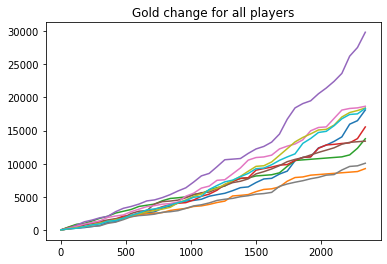

In [29]:
for player in match['players']:
    plt.plot(player['times'], player['gold_t'])
    
plt.title('Gold change for all players');

#### Функция для чтения файлов с описаниями игр

Следующая функция `read_matches(filename)` может использоваться для чтения необработанных данных об играх Dota 2.

Мы рекомендуем установить два пакета Python: `ujson` и `tqdm`, это сделает выполнение быстрее и

In [30]:
import os

try:
    import ujson as json
except ModuleNotFoundError:
    import json
    print ('Please install ujson to read JSON oblects faster')
    
try:
    from tqdm.notebook import tqdm
except ModuleNotFoundError:
    tqdm = lambda x: x
    print ('Please install tqdm to track progress with Python loops')

def read_matches(matches_file):
    
    MATCHES_COUNT = {
        'test_matches.jsonl': 10000,
        'train_matches.jsonl': 39675,
    }
    _, filename = os.path.split(matches_file)
    total_matches = MATCHES_COUNT.get(filename)
    
    with open(matches_file) as fin:
        for line in tqdm(fin, total=total_matches):
            yield json.loads(line)

#### Чтение данных в цикле

Чтение данных по всем играм может занять 2-3 минуты. Таким образом, вам лучше придерживаться следующего подхода:

1. Прочитайте небольшое количество (10-100) игр
2. Напишите код для извлечения признаков из этих объектов JSON.
3. Убедитесь, что код работает нормально
4. Запустите код со всеми доступными данными
5. Сохраняйте результаты в файл `pickle`, чтобы в следующий раз не выполнять все вычисления с нуля.

In [31]:
for match in read_matches(os.path.join(PATH_TO_DATA, 'train_matches.jsonl')):
    match_id_hash = match['match_id_hash']
    game_time = match['game_time']
    
    # processing each game
    
    for player in match['players']:
        pass  # processing each player

  0%|          | 0/39675 [00:00<?, ?it/s]

## Генерация признаков

In [32]:
def add_new_features(df_features, matches_file):
    
    # Process raw data and add new features
    for match in read_matches(matches_file):
        match_id_hash = match['match_id_hash']

        # Counting ruined towers for both teams
        radiant_tower_kills = 0
        dire_tower_kills = 0
        for objective in match['objectives']:
            if objective['type'] == 'CHAT_MESSAGE_TOWER_KILL':
                if objective['team'] == 2:
                    radiant_tower_kills += 1
                if objective['team'] == 3:
                    dire_tower_kills += 1

        # Write new features
        df_features.loc[match_id_hash, 'radiant_tower_kills'] = radiant_tower_kills
        df_features.loc[match_id_hash, 'dire_tower_kills'] = dire_tower_kills
        df_features.loc[match_id_hash, 'diff_tower_kills'] = radiant_tower_kills - dire_tower_kills
        
        # ... here you can add more features ...
        

In [33]:
# copy the dataframe with features
df_train_features_extended = df_train_features.copy()

# add new features
add_new_features(df_train_features_extended, os.path.join(PATH_TO_DATA, 'train_matches.jsonl'))

  0%|          | 0/39675 [00:00<?, ?it/s]

Мы видим новые признаки, добавленные справа.

In [34]:
df_train_features_extended.head()

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed,radiant_tower_kills,dire_tower_kills,diff_tower_kills
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,22,7,1,11,11,0,0,0,0,...,0,0,0.00,0,0,0,0,0.0,0.0,0.0
b9c57c450ce74a2af79c9ce96fac144d,658,4,0,3,10,15,7,2,0,7,...,0,0,0.00,0,0,0,0,2.0,0.0,2.0
6db558535151ea18ca70a6892197db41,21,23,0,0,0,101,0,0,0,0,...,0,0,0.00,0,0,0,0,0.0,0.0,0.0
46a0ddce8f7ed2a8d9bd5edcbb925682,576,22,7,1,4,14,1,0,3,1,...,3,0,0.00,0,0,2,0,0.0,0.0,0.0
b1b35ff97723d9b7ade1c9c3cf48f770,453,22,7,1,3,42,0,1,1,0,...,2,0,0.25,0,0,0,0,0.0,0.0,0.0


#### Оценка новых признаков

Давайте запустим перекрестную проверку с фиксированной моделью, но с двумя разными наборами данных:

1. с признаками, созданными организаторами (база)
2. с новыми признаками, которые мы добавили (расширили)

In [35]:
%%time

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, n_jobs=4, random_state=17)

cv_scores_base = cross_val_score(model, X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
cv_scores_extended = cross_val_score(model, df_train_features_extended.values, y, cv=cv, scoring='roc_auc', n_jobs=-1)

Wall time: 43.2 s


In [36]:
print('Base features: mean={} scores={}'.format(cv_scores_base.mean(), cv_scores_base))
print('Extended features: mean={} scores={}'.format(cv_scores_extended.mean(), cv_scores_extended))

Base features: mean=0.7795738699757455 scores=[0.77723183 0.78656801 0.78004904 0.77732062 0.77669984]
Extended features: mean=0.7862340339233831 scores=[0.78570687 0.79044313 0.78708931 0.78227352 0.78565735]


In [37]:
cv_scores_extended > cv_scores_base

array([ True,  True,  True,  True,  True])

Как мы видим, `RandomForestClassifier` показывает лучшие результаты перекрестной проверки в случае расширенного набора данных. Выглядит разумно, для этого мы и создаем функции.

#### Новая отправка

In [38]:
%%time
# Build the same features for the test set
df_test_features_extended = df_test_features.copy()
add_new_features(df_test_features_extended, os.path.join(PATH_TO_DATA, 'test_matches.jsonl'))

  0%|          | 0/10000 [00:00<?, ?it/s]

Wall time: 13.5 s


In [39]:
model = RandomForestClassifier(n_estimators=100, n_jobs=4, random_state=17)
model.fit(X, y)
df_submission_base = pd.DataFrame(
    {'radiant_win_prob': model.predict_proba(df_test_features.values)[:, 1]}, 
    index=df_test_features.index,
)
df_submission_base.to_csv('submission_base_rf.csv')

In [40]:
model_extended = RandomForestClassifier(n_estimators=100, n_jobs=4, random_state=17)
model_extended.fit(df_train_features_extended.values, y)
df_submission_extended = pd.DataFrame(
    {'radiant_win_prob': model_extended.predict_proba(df_test_features_extended.values)[:, 1]}, 
    index=df_test_features.index,
)
df_submission_extended.to_csv('submission_extended_rf.csv')

In [41]:
# this one will be used as a final submission in this kernel
!cp submission_extended_rf.csv submission.csv

"cp" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


## Как создать начальные признаки с нуля

Теперь мы раскрываем код, который мы использовали для создания первоначальных признаков `train_features.csv` и `test_features.csv`. Вы можете изменить следующий код, чтобы добавить дополнительные функции.

В двух словах:

1. функция `extract_features_csv(match)` извлекает характеристики из описания игры и записывает их в словарь.
2. функция `extract_targets_csv(match, target)` извлекает целевую переменную `radiant_win`
3. перебирая файл с необработанными данными, собираем все признаки
4. с помощью `pandas.DataFrame.from_records()` мы создаем датафреймы с новыми признаками.

In [42]:
import collections

MATCH_FEATURES = [
    ('game_time', lambda m: m['game_time']),
    ('game_mode', lambda m: m['game_mode']),
    ('lobby_type', lambda m: m['lobby_type']),
    ('objectives_len', lambda m: len(m['objectives'])),
    ('chat_len', lambda m: len(m['chat'])),
]

PLAYER_FIELDS = [
    'hero_id',
    
    'kills',
    'deaths',
    'assists',
    'denies',
    
    'gold',
    'lh',
    'xp',
    'health',
    'max_health',
    'max_mana',
    'level',

    'x',
    'y',
    
    'stuns',
    'creeps_stacked',
    'camps_stacked',
    'rune_pickups',
    'firstblood_claimed',
    'teamfight_participation',
    'towers_killed',
    'roshans_killed',
    'obs_placed',
    'sen_placed',
]

def extract_features_csv(match):
    row = [
        ('match_id_hash', match['match_id_hash']),
    ]
    
    for field, f in MATCH_FEATURES:
        row.append((field, f(match)))
        
    for slot, player in enumerate(match['players']):
        if slot < 5:
            player_name = 'r%d' % (slot + 1)
        else:
            player_name = 'd%d' % (slot - 4)

        for field in PLAYER_FIELDS:
            column_name = '%s_%s' % (player_name, field)
            row.append((column_name, player[field]))
            
    return collections.OrderedDict(row)
    
def extract_targets_csv(match, targets):
    return collections.OrderedDict([('match_id_hash', match['match_id_hash'])] + [
        (field, targets[field])
        for field in ['game_time', 'radiant_win', 'duration', 'time_remaining', 'next_roshan_team']
    ])

In [43]:
%%time

df_new_features = []
df_new_targets = []

for match in read_matches(os.path.join(PATH_TO_DATA, 'train_matches.jsonl')):
    match_id_hash = match['match_id_hash']
    features = extract_features_csv(match)
    targets = extract_targets_csv(match, match['targets'])
    
    df_new_features.append(features)
    df_new_targets.append(targets)
    

  0%|          | 0/39675 [00:00<?, ?it/s]

Wall time: 52.9 s


In [44]:
df_new_features = pd.DataFrame.from_records(df_new_features).set_index('match_id_hash')
df_new_targets = pd.DataFrame.from_records(df_new_targets).set_index('match_id_hash')

In [45]:
df_new_features.head()

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,22,7,1,11,11,0,0,0,0,...,0.000,0,0,0,0,0.00,0,0,0,0
b9c57c450ce74a2af79c9ce96fac144d,658,4,0,3,10,15,7,2,0,7,...,0.000,0,0,0,0,0.00,0,0,0,0
6db558535151ea18ca70a6892197db41,21,23,0,0,0,101,0,0,0,0,...,0.000,0,0,0,0,0.00,0,0,0,0
46a0ddce8f7ed2a8d9bd5edcbb925682,576,22,7,1,4,14,1,0,3,1,...,8.665,3,1,3,0,0.00,0,0,2,0
b1b35ff97723d9b7ade1c9c3cf48f770,453,22,7,1,3,42,0,1,1,0,...,0.000,2,1,2,0,0.25,0,0,0,0


## Продолжай!

- Обсуждайте новые идеи в Slack
- Создание новых признаков
- Попробуйте новые модели и ансамбли
- Отправить прогнозы
- Иди и побеждай!